### Assignment ~ K-Nearest Neighbors (KNN)

#### 1st Problem Statement 
Prepare a model for glass classification using KNN

Dataset --> glass.csv

In [1]:
# Loading the Required Library for KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/glass.csv")
Dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#Checking For NA Values
Dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Infernce: There are NA Values Present in the Dataset,Also "Type" column is Class/Y Variable So will Separate Them

In [4]:
#Separating the X & Y Variable
X = Dataset.iloc[:, 0:9]
Y = Dataset.iloc[:,9]

In [5]:
#Creating the k-folds 
num_folds = 10
kfold = KFold(num_folds)

In [6]:
#KNN Instance
model = KNeighborsClassifier(n_neighbors=5) # initially taking K-value = 5
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100)

52.48917748917749


Inference: When Initially took k-value of 5 then the accuracy came 52.48%, Now will hyper Tune the parameter Using Grid Search CV

#### Grid Search CV for Parameter Tuning

In [7]:
#Loading the Required library
from sklearn.model_selection import GridSearchCV

In [8]:
#Giving Multiple Value of K By using a Range
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [9]:
#Creating Model Instance (KNN)
model = KNeighborsClassifier()

#Grid Search Instance
grid = GridSearchCV(estimator=model, param_grid=param_grid)

#Fitting the X & Y Variable
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [10]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


Inference: The best K-value will be 1 based on Grid Search CV with Accuracy of 64.05%

### Visualizing the CV results

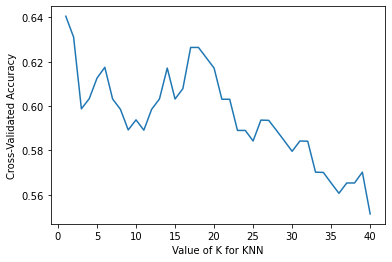

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Inference:As You can see around kvalue 1 the highest is the Peak i.e arounnd 0.64,

So Our Final Model Should have K-value= = 1 which will give 64% accuracy as per Grid Search CV

#### 2nd Problem Statement 
Implement a KNN model to classify the animals in to categories

Dataset --> Zoo.csv

In [12]:
# Loading the Required Library for KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [13]:
#Loading The Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Zoo.csv")
Dataset.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
#Getting Information of Dataset "Zoo"
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Infernce: There are NA Values Present in the Dataset,Also "Type" column is Class/Y Variable So will Separate Them & "animal name" is a Categorial Variable with Different animals so will Drop it

In [15]:
#Separating the X & Y Variable & Droping "animal name" Column
X = Dataset.iloc[:, 1:17]
Y = Dataset.iloc[:,17]

In [16]:
#Creating the k-folds 
num_folds = 10
kfold = KFold(num_folds)

In [17]:
#KNN Instance
model = KNeighborsClassifier(n_neighbors=10) # initially taking K-value = 10
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100)

78.0


Inference: When Initially took k-value of 10 then the accuracy came 78.0%, Now will hyper Tune the parameter Using Grid Search CV

#### Grid Search CV for Parameter Tuning

In [18]:
#Loading the Required library
from sklearn.model_selection import GridSearchCV

In [19]:
#Giving Multiple Value of K By using a Range
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [20]:
#Creating Model Instance (KNN)
model = KNeighborsClassifier()

#Grid Search Instance
grid = GridSearchCV(estimator=model, param_grid=param_grid)

#Fitting the X & Y Variable
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


Inference: The best K-value will be 1 based on Grid Search CV with Accuracy of 97.0%

### Visualizing the CV results

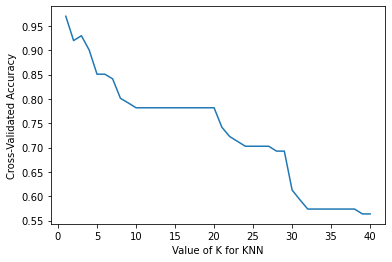

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Inference:As You can see around kvalue 1 the highest is the Peak i.e arounnd 0.97,

So Our Final Model Should have K-value= = 1 which will give 97% accuracy as per Grid Search CV